In [1]:
# Algoritm de clustering si anume gmm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('Wholecust.csv')

In [3]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [5]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [6]:
#coloana de email si adresa stergem
df=df.drop(['Region','Channel'], axis=1)

In [7]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [8]:
# extragem matricea x
X = df.values

In [9]:
X

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [10]:
# in cate grupe impartim data-setul nostru ...utilizam Silhouete_Score
#importam functia sklearn
from sklearn.metrics import silhouette_score 
from sklearn.mixture import GaussianMixture

In [11]:
# cream variabila scores in care vom pastra grupurile moastre
scores = []
for k in range(2,11):
    gmm = GaussianMixture(n_components = k)
    gmm.fit(X)
    y_pred = gmm.predict(X)
    scores.append(silhouette_score(X,y_pred))

In [12]:
scores

[0.3977873958673807,
 0.20627369858344732,
 0.11768784777654508,
 0.13552749587797935,
 0.13035866718712644,
 0.08513286740622894,
 0.09343348994593587,
 0.12442166376067391,
 0.0547968783217739]

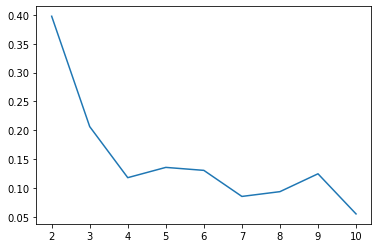

In [14]:
# sa facem un grafic pentru datele obtinute
plt.plot(range(2,11), scores)

In [15]:
# antrenam modelul GaussianMixture
gmm = GaussianMixture(n_components = 5)

In [16]:
gmm.fit(X)

GaussianMixture(n_components=5)

In [17]:
y_pred = gmm.predict(X)

In [18]:
y_pred

array([2, 2, 1, 0, 4, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 4, 2, 2, 2, 0,
       4, 1, 1, 2, 0, 0, 1, 4, 2, 2, 0, 4, 0, 2, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 4, 2, 4, 2, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 4, 1,
       2, 2, 4, 0, 4, 1, 4, 4, 2, 0, 4, 2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 3,
       4, 4, 0, 0, 1, 3, 2, 2, 2, 0, 0, 0, 2, 2, 2, 4, 2, 0, 2, 2, 2, 1,
       0, 2, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 4, 3, 0, 2, 2, 4, 0, 0,
       0, 0, 0, 0, 1, 2, 2, 2, 4, 4, 4, 0, 4, 1, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2,
       4, 2, 2, 4, 2, 3, 2, 3, 0, 2, 4, 1, 2, 2, 4, 0, 0, 1, 0, 4, 4, 2,
       4, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 4, 2, 0, 2, 4, 2, 0, 4, 0, 4, 4, 0,
       0, 2, 2, 2, 0, 0, 2, 4, 0, 1, 0, 4, 1, 0, 2, 1, 4, 4, 2, 0, 0, 1,
       2, 1, 1, 4, 2, 0, 0, 2, 2, 4, 2, 0, 4, 4, 0, 2, 0, 2, 4, 4, 4, 4,
       2, 0, 0, 4, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2,

In [20]:
# ne permite sa extragem meens...vectori medii a diferitor clusteri
gmm.means_

array([[10477.03226095,  1449.89658513,  2134.61036578,  2676.91185499,
          303.91088162,   638.04930686],
       [ 8546.48587747, 16814.66623909, 23442.28113604,  2886.34043555,
        10166.78535314,  3196.50864503],
       [ 7286.10238223,  6401.45884094,  9484.05968361,  1020.88090609,
         3885.46115005,  1176.59786094],
       [52088.49333581, 16991.50373128, 11537.50122431, 28667.83668123,
         1481.16686075, 13344.83676314],
       [23061.96147013,  4005.31192526,  4471.15975296,  6094.0250743 ,
          648.92191928,  1770.17835192]])

In [21]:
cluster_table = pd.DataFrame(gmm.means_, columns = df.columns)

In [22]:
cluster_table
# avem o analiza prescriptiva
#fiecare rand este raand pentru fiecare cluster in parte

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,10477.032261,1449.896585,2134.610366,2676.911855,303.910882,638.049307
1,8546.485877,16814.666239,23442.281136,2886.340436,10166.785353,3196.508645
2,7286.102382,6401.458841,9484.059684,1020.880906,3885.461150,1176.597861
3,52088.493336,16991.503731,11537.501224,28667.836681,1481.166861,13344.836763
4,23061.961470,4005.311925,4471.159753,6094.025074,648.921919,1770.178352


In [23]:
cluster_table.std()

Fresh               18855.594273
Milk                 7306.652044
Grocery              8299.527714
Frozen              11550.138072
Detergents_Paper     4086.819882
Delicassen           5296.574491
dtype: float64

In [26]:
cluster_table[['Fresh','Milk','Grocery','Frozen']]

,Fresh,Milk,Grocery,Frozen
0,10477.032261,1449.896585,2134.610366,2676.911855
1,8546.485877,16814.666239,23442.281136,2886.340436
2,7286.102382,6401.458841,9484.059684,1020.880906
3,52088.493336,16991.503731,11537.501224,28667.836681
4,23061.961470,4005.311925,4471.159753,6094.025074
